In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/IDC_regular_ps50_idx5.zip &> /dev/null

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from glob import glob
from keras.utils import load_img, img_to_array

In [ ]:
files = glob('/content/IDC_regular_ps50_idx5/*/*/*')

In [ ]:
files[:10]

['/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x551_y1201_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x101_y751_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x201_y851_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x501_y751_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x151_y851_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x401_y701_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x101_y701_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x501_y1251_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x201_y751_class1.png',
 '/content/IDC_regular_ps50_idx5/16569/1/16569_idx5_x501_y1201_class1.png']

In [ ]:
count =0 
for file in files:
    if file[-5] == '1':
        count+=1
print(count)

78786


In [ ]:
len(files)

277524

In [ ]:
def show_img(files):
    plt.figure(figsize= (10,10))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        i+=1

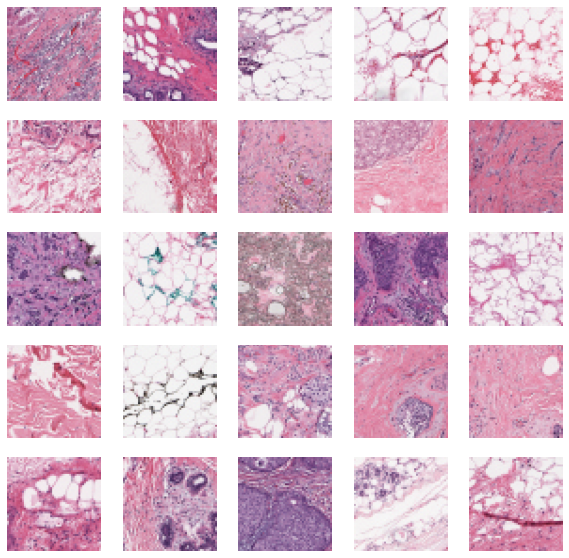

In [ ]:
show_img(files)

## Handling Class Imbalance Problem 

In [ ]:
def load_balanced_data(files, size, start_index):
    half_size = int(size/2)
    count=0
    res = []
    y = []
    for file in tqdm(files[start_index:]):
        if (count!=half_size):
            if file[-5] == '1' and file.endswith(".png"):
                img = load_img(file, target_size = (75,75))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(1)
                count += 1      
        else:
            break
                
    for file in tqdm(files[start_index:]):
        if(count!=0):
            if(file[-5] == '0'):
                img = load_img(file, target_size = (75,75))
                pixels = img_to_array(img)
                pixels /= 255
                res.append(pixels)
                y.append(0)
                count -= 1
        else:
            break
    return np.stack(res), y

In [ ]:
X_train, y_train = load_balanced_data(files, 100000,0)

 28%|██▊       | 77971/277524 [00:49<02:05, 1585.06it/s]


In [ ]:
# save to npy file
np.save('/content/gdrive/MyDrive/Breast Cancer Detection/Data/X_train.npy', X_train)
np.save('/content/gdrive/MyDrive/Breast Cancer Detection/Data/y_train.npy', y_train)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

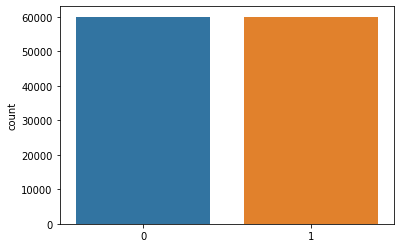

In [ ]:
sns.countplot(y_train)

In [ ]:
X_val, y_val = load_balanced_data(files, 15000,215000)
x_test, y_test = load_balanced_data(files, 15000, 245000)

 35%|███▍      | 11368/32524 [00:06<00:12, 1741.62it/s]


In [ ]:
# save to npy file
np.save('/content/gdrive/MyDrive/Breast Cancer Detection/Data/X_val.npy', X_val)
np.save('/content/gdrive/MyDrive/Breast Cancer Detection/Data/y_val.npy', y_val)
np.save('/content/gdrive/MyDrive/Breast Cancer Detection/Data/X_test.npy', x_test)
np.save('/content/gdrive/MyDrive/Breast Cancer Detection/Data/y_test.npy', y_test)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

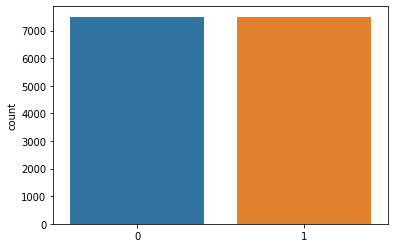

In [ ]:
sns.countplot(y_test)